In [1]:
# TODOS
# dynamisch mehrere Faktoren hinzufügen
# Addition und Multiplikation der Faktoren ermöglichen
# Farbgebung fixen
# Bug in Anornung der Ranks fixen

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

number_entries = 10
number_iterations = 10
fixed_val_min = 160 # not diminished
fixed_val_max = 200 # not diminished
intervene_val_min = -10 # interventionswert diminished
intervene_val_max = 10 # interventionswert diminished
random_val_min = -5
random_val_max = 5

In [2]:
# game setup

data_temp = [] #Variablen id, gen_val, ses_val, random_val

def number_to_letters(n):
    result = ''
    while n >= 0:
        result = chr(n % 26 + 65) + result
        n = n // 26 - 1
        if n < 0:
            break
    return result

# generate data
count = 0
for i in range(number_entries):
    data_temp.append([number_to_letters(count),
                      random.randint(fixed_val_min, fixed_val_max), 
                      random.randint(intervene_val_min, intervene_val_max), 
                      random.randint(random_val_min, random_val_max)])
    count += 1
    
data_firstgen = sorted(data_temp, key=lambda x: x[1] + x[2] + x[3], reverse=True)

In [3]:
print(data_firstgen)

[['A', 194, 5, 2], ['H', 199, 2, -2], ['C', 200, -3, -1], ['I', 178, 7, 2], ['D', 171, 7, 4], ['E', 181, 4, -5], ['F', 179, 1, -3], ['B', 176, -4, 3], ['G', 183, -9, -2], ['J', 167, -10, -1]]


In [4]:
# create children

def make_children(iterations, data, hist = None):
    if hist is None:
        hist = []
        hist.append(data)
    if iterations == 0:
        return hist
    else:
        iterations -= 1
        temp = []
        for tt in data:
            temp.append([tt[0],
                         tt[1], 
                         tt[2]/2, 
                         random.randint(random_val_min, random_val_max)])
        hist.append(sorted(temp, key=lambda x: x[1] + x[2] + x[3], reverse=True))
        return make_children(iterations, sorted(temp, key=lambda x: x[1] + x[2] + x[3], reverse=True), hist)

evolution = make_children(number_iterations, data_firstgen)

In [5]:
print(evolution)

[[['A', 194, 5, 2], ['H', 199, 2, -2], ['C', 200, -3, -1], ['I', 178, 7, 2], ['D', 171, 7, 4], ['E', 181, 4, -5], ['F', 179, 1, -3], ['B', 176, -4, 3], ['G', 183, -9, -2], ['J', 167, -10, -1]], [['A', 194, 2.5, 5], ['C', 200, -1.5, 3], ['H', 199, 1.0, -5], ['F', 179, 0.5, 5], ['I', 178, 3.5, 2], ['E', 181, 2.0, -2], ['D', 171, 3.5, 3], ['G', 183, -4.5, -4], ['B', 176, -2.0, 0], ['J', 167, -5.0, 0]], [['C', 200, -0.75, 3], ['A', 194, 1.25, 5], ['H', 199, 0.5, 0], ['I', 178, 1.75, 5], ['G', 183, -2.25, 3], ['B', 176, -1.0, 5], ['F', 179, 0.25, -1], ['E', 181, 1.0, -5], ['D', 171, 1.75, 3], ['J', 167, -2.5, 4]], [['C', 200, -0.375, 2], ['A', 194, 0.625, 4], ['H', 199, 0.25, -4], ['E', 181, 0.5, 3], ['I', 178, 0.875, -1], ['F', 179, 0.125, -2], ['G', 183, -1.125, -5], ['D', 171, 0.875, 5], ['B', 176, -0.5, -1], ['J', 167, -1.25, 5]], [['C', 200, -0.1875, 4], ['H', 199, 0.125, 3], ['A', 194, 0.3125, 4], ['I', 178, 0.4375, 5], ['G', 183, -0.5625, -1], ['E', 181, 0.25, -2], ['F', 179, 0.0625,

In [6]:

# social mobility - Differenz von ranking_t zu ranking_t-1 -> Rnkaing funktioniert noch nicht -> Vergleich erst nach Erstellung der Werte machen
mobility=[]
mobility_with_rank = []

for i in range(len(evolution)):
    if i == 0:
        temp = []
        temp2=[]
        for tup in evolution[i]:
            temp.append([tup[0],0])
            temp2.append([tup[0],0,0])
        mobility.append(temp)
        mobility_with_rank.append(temp2)
    else:
        rank_current = 0
        temp = []
        temp2=[]
        for tup_t in evolution[i]:
            rank_before = 0
            for tuptb in evolution[i-1]:
                if tup_t[0]==tuptb[0]:
                    temp.append([tup_t[0],rank_before-rank_current])
                    temp2.append([tup_t[0], rank_before-rank_current, rank_current])
                    break
                rank_before += 1
            rank_current += 1
        mobility.append(temp)
        mobility_with_rank.append(temp2)

print(mobility)

[[['A', 0], ['H', 0], ['C', 0], ['I', 0], ['D', 0], ['E', 0], ['F', 0], ['B', 0], ['G', 0], ['J', 0]], [['A', 0], ['C', 1], ['H', -1], ['F', 3], ['I', -1], ['E', 0], ['D', -2], ['G', 1], ['B', -1], ['J', 0]], [['C', 1], ['A', -1], ['H', 0], ['I', 1], ['G', 3], ['B', 3], ['F', -3], ['E', -2], ['D', -2], ['J', 0]], [['C', 0], ['A', 0], ['H', 0], ['E', 4], ['I', -1], ['F', 1], ['G', -2], ['D', 1], ['B', -3], ['J', 0]], [['C', 0], ['H', 1], ['A', -1], ['I', 1], ['G', 2], ['E', -2], ['F', -1], ['B', 1], ['D', -1], ['J', 0]], [['C', 0], ['A', 1], ['H', -1], ['I', 0], ['B', 3], ['G', -1], ['E', -1], ['D', 1], ['F', -2], ['J', 0]], [['C', 0], ['H', 1], ['A', -1], ['I', 0], ['E', 2], ['G', 0], ['F', 2], ['B', -3], ['D', -1], ['J', 0]], [['C', 0], ['H', 0], ['A', 0], ['E', 1], ['F', 2], ['I', -2], ['G', -1], ['B', 0], ['D', 0], ['J', 0]], [['C', 0], ['H', 0], ['A', 0], ['G', 3], ['E', -1], ['B', 2], ['I', -1], ['F', -3], ['D', 0], ['J', 0]], [['C', 0], ['H', 0], ['A', 0], ['F', 4], ['E', 0], ['B

In [7]:
# Farbwerte - Values normalisieren auf [-1, 1]
mobility_normalized = [[item[:] for item in entry] for entry in mobility]
all_values = [item[1] for entry in mobility_normalized for item in entry]
values_to_normalize = np.array(all_values)

min_value = values_to_normalize.min()
max_value = values_to_normalize.max()

if max_value != min_value:
    a = -1
    b = 1
    normalized_values = a + (values_to_normalize - min_value) * (b - a) / (max_value - min_value)

    # Werte zurückschreiben
    i = 0
    for entry in mobility_normalized:
        for item in entry:
            if item[1] != 0:
                item[1] = float(normalized_values[i])
            i += 1

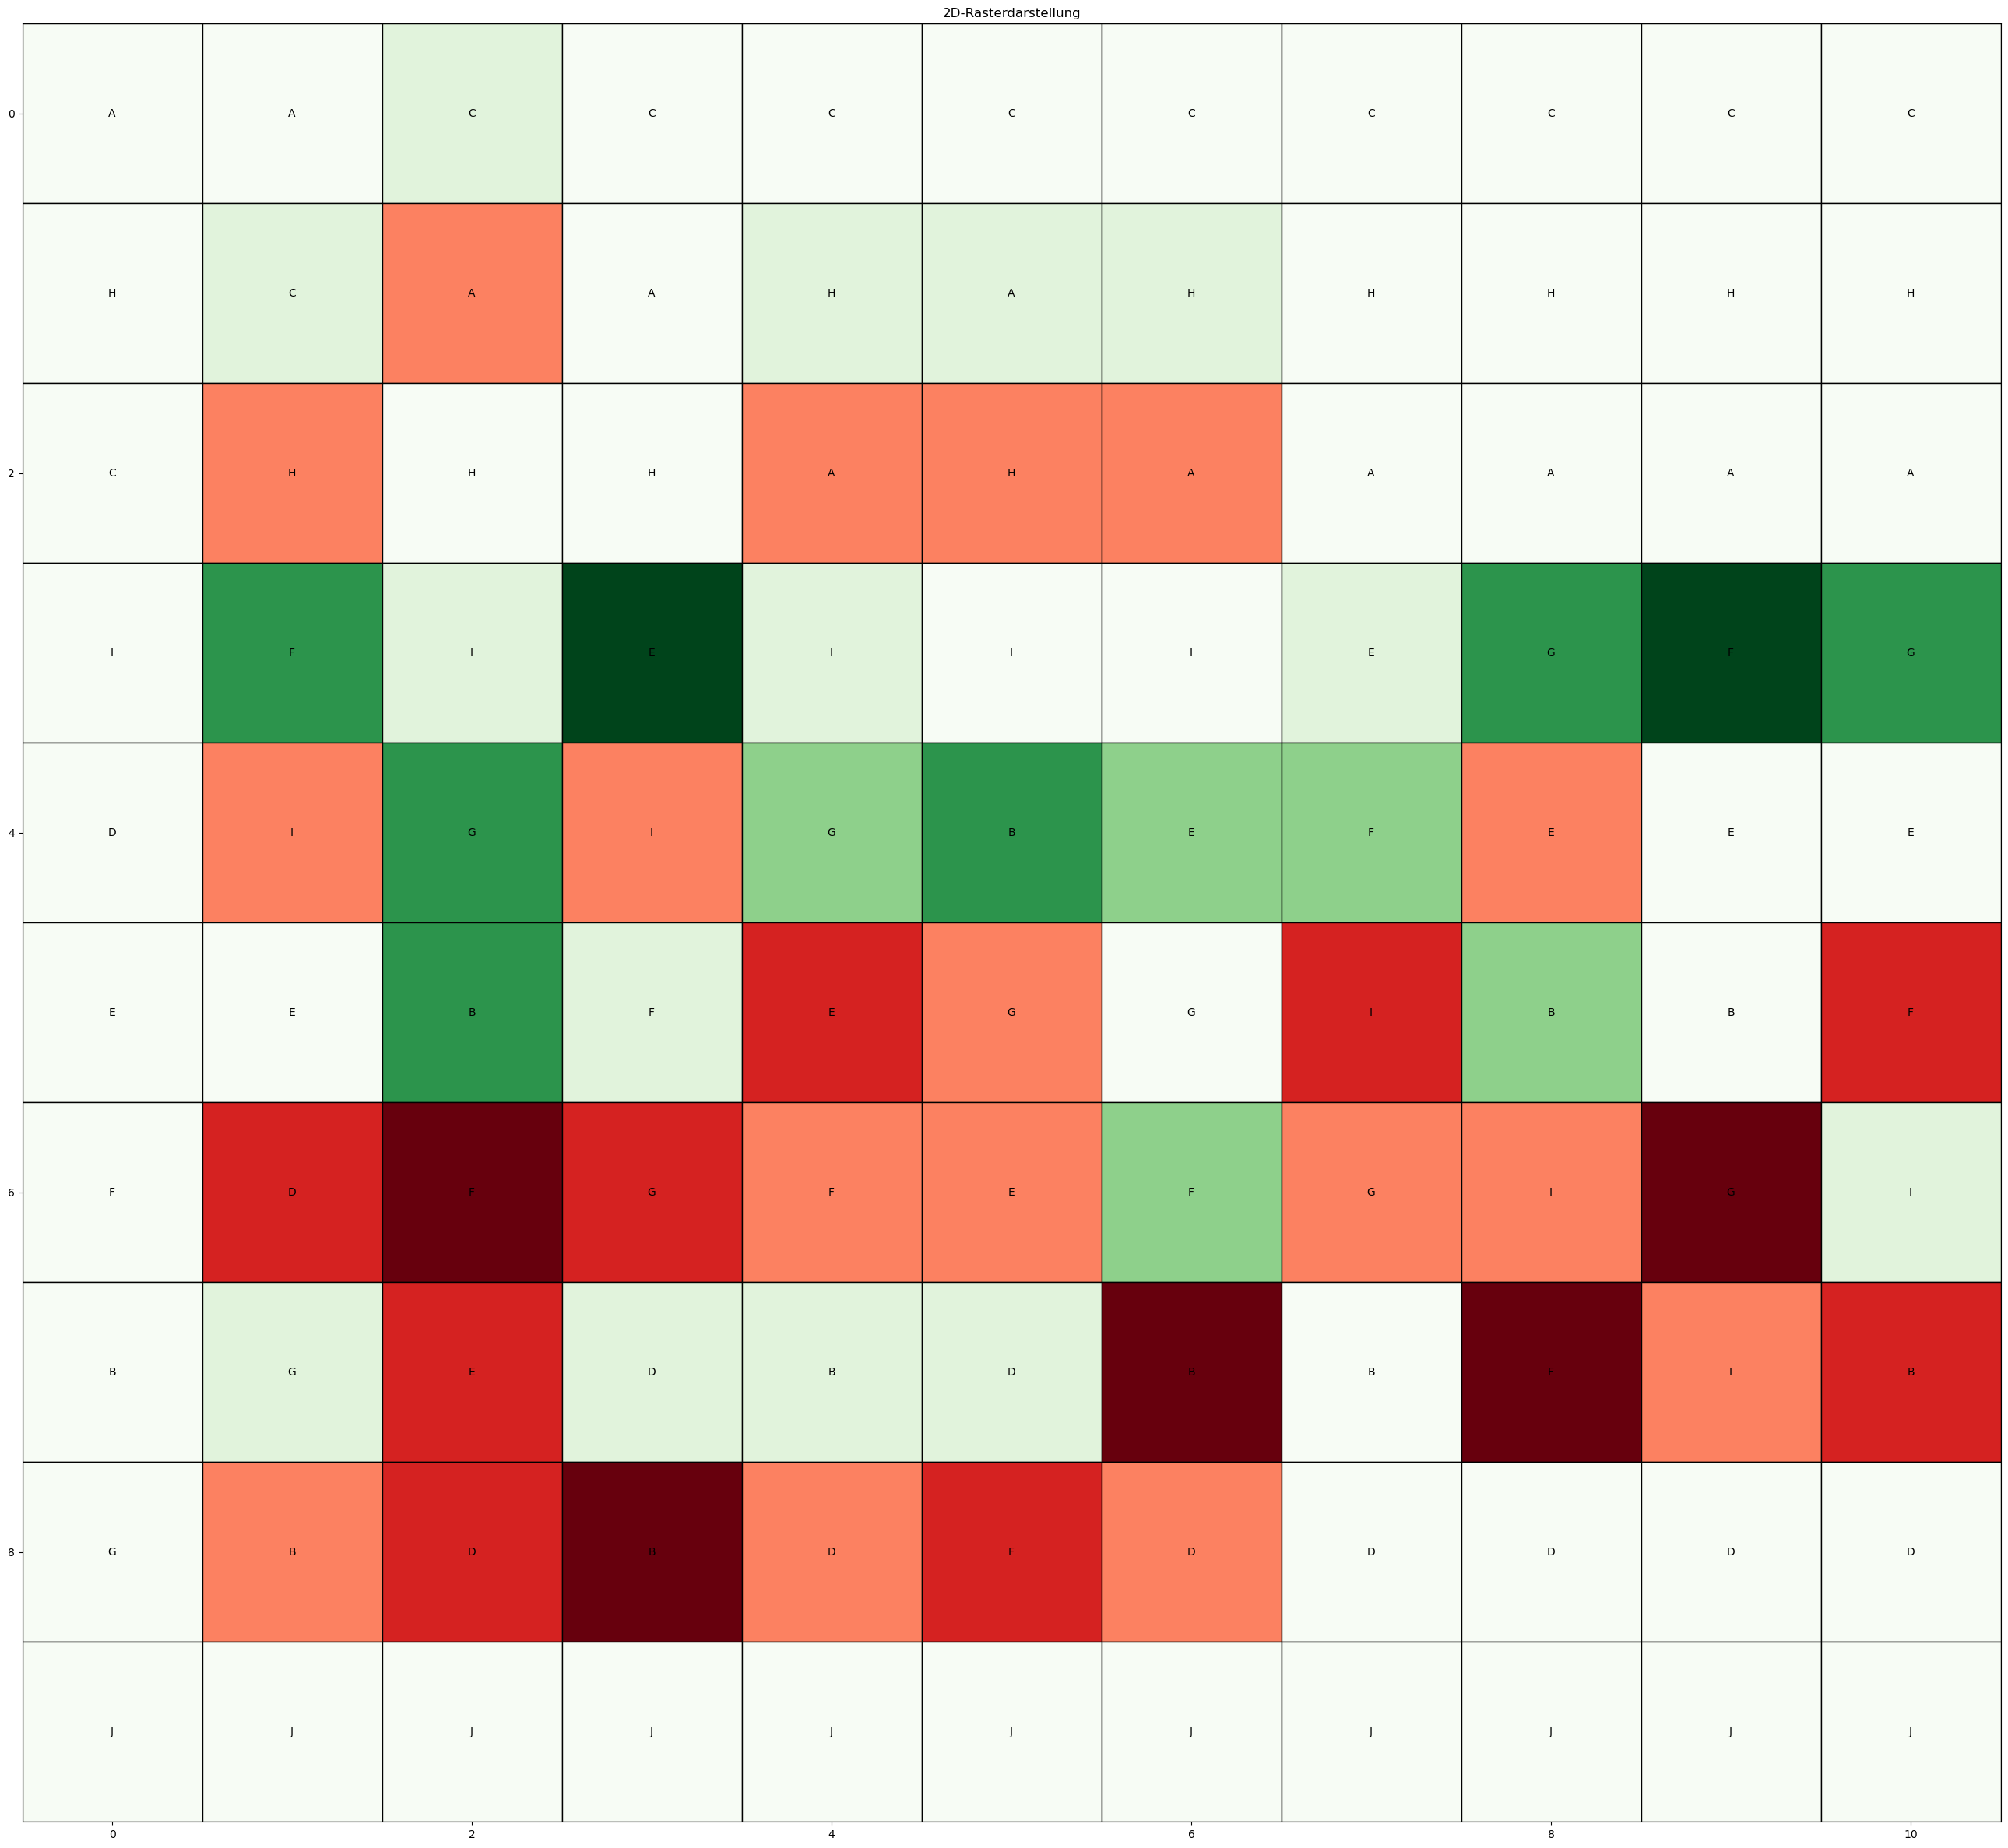

In [8]:
# plot mobility

x_size=len(mobility_normalized) # Anzahl der Einträge (Generationen)
#print(x_size)
y_size=len(mobility_normalized[0]) # Anzahl des Samples
#print(y_size)

fig, ax = plt.subplots(figsize=(70, 30)) # hier Größe des Plots ändern!!1!!!11!!! (breite, höhe)
ax.set_title("2D-Rasterdarstellung")

# Achsen anpassen
ax.set_xlim(-0.5, x_size - 0.5)
ax.set_ylim(-0.5, y_size - 0.5)
ax.invert_yaxis()  # Damit (0,0) oben links ist
ax.set_aspect('equal')

def get_color(value):
    # für Aufstieg grün, für Abstieg rot
    if value >= 0:
        # Skalierung von 0 (grün) bis 1 (intensiver grün)
        color = plt.cm.Greens(value)  # Verwende die Greens Colormap
    else:
        # Skalierung von 0 (rot) bis -1 (intensiver rot)
        color = plt.cm.Reds(-value)   # Verwende die Reds Colormap, negiere den Wert
    return color

for x in range(x_size):
    for y in range(y_size):
        name = mobility_normalized[x][y][0]
        color_n = mobility_normalized[x][y][1]
        
        rect = plt.Rectangle((x - 0.5, y - 0.5), 1, 1, color=get_color(color_n), ec='black')
        ax.add_patch(rect)
        # Text in die Mitte setzen
        ax.text(x, y, name, ha='center', va='center', fontsize=10, color='black')

plt.show()